In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files                                                                   #import dataset
uploaded=files.upload()


Saving Automobile_data.csv to Automobile_data.csv


In [3]:
dataSet="Automobile_data.csv"                         #read data set and save it to variable df
df = pd.read_csv(dataSet)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [6]:
selected_columns = ['highway-mpg','num-of-cylinders','fuel-system','horsepower','curb-weight',
                'stroke','engine-type','make']


In [7]:
subset_df=df[selected_columns]
subset_df.head()

,highway-mpg,num-of-cylinders,fuel-system,horsepower,curb-weight,stroke,engine-type,make
0,27,four,mpfi,111,2548,2.68,dohc,alfa-romero
1,27,four,mpfi,111,2548,2.68,dohc,alfa-romero
2,26,six,mpfi,154,2823,3.47,ohcv,alfa-romero
3,30,four,mpfi,102,2337,3.4,ohc,audi
4,22,five,mpfi,115,2824,3.4,ohc,audi


In [8]:
subset_df = subset_df.copy()    #copy dataset because otherwise it gives warnings when changing the data types later
subset_df.replace('?', np.nan, inplace=True)       #replace question marks with nan
num_of_cylinders_mapping = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}  #create a dictionary to turn word representations to number
subset_df['num-of-cylinders'] = subset_df['num-of-cylinders'].map(num_of_cylinders_mapping)                   #turn word representations to number
subset_df.loc[:, ['horsepower','curb-weight','stroke']] = (subset_df[['horsepower','curb-weight','stroke']]).astype(float)  #turn the other data that is in object format to floats

<ipython-input-8-b83e941f2145>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, ['horsepower','curb-weight','stroke']] = (subset_df[['horsepower','curb-weight','stroke']]).astype(float)  #turn the other data that is in object format to floats


In [9]:
subset_df.info() #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   highway-mpg       205 non-null    int64  
 1   num-of-cylinders  205 non-null    int64  
 2   fuel-system       205 non-null    object 
 3   horsepower        203 non-null    float64
 4   curb-weight       205 non-null    float64
 5   stroke            201 non-null    float64
 6   engine-type       205 non-null    object 
 7   make              205 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.9+ KB


In [10]:
subset_df.sample(20) #check 20 raws from data

,highway-mpg,num-of-cylinders,fuel-system,horsepower,curb-weight,stroke,engine-type,make
52,38,4,2bbl,68.0,1905.0,3.15,ohc,mazda
103,25,6,mpfi,152.0,3060.0,3.27,ohcv,nissan
62,32,4,2bbl,84.0,2410.0,3.39,ohc,mazda
163,34,4,2bbl,70.0,2169.0,3.03,ohc,toyota
184,46,4,idi,52.0,2264.0,3.40,ohc,volkswagen
55,23,2,4bbl,101.0,2380.0,NaN,rotor,mazda
169,30,4,mpfi,116.0,2551.0,3.50,ohc,toyota
106,25,6,mpfi,160.0,3139.0,3.27,ohcv,nissan
73,16,8,mpfi,184.0,3900.0,3.35,ohcv,mercedes-benz
153,37,4,2bbl,62.0,2280.0,3.03,ohc,toyota


In [11]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [12]:
import seaborn as sns

<Axes: xlabel='horsepower'>

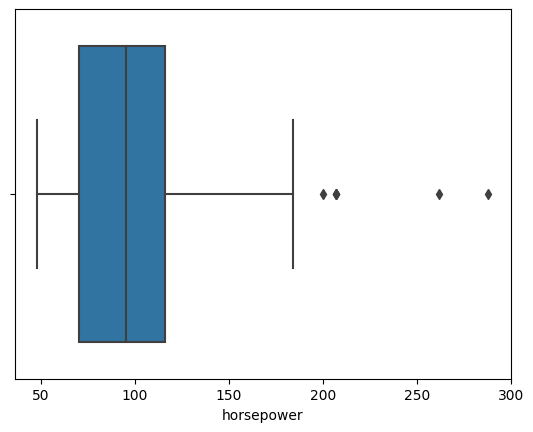

In [13]:
sns.boxplot(x = subset_df['horsepower'])

In [14]:
median = subset_df['horsepower'].median()
subset_df['horsepower'] = subset_df['horsepower'].fillna(median)
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   highway-mpg       205 non-null    int64  
 1   num-of-cylinders  205 non-null    int64  
 2   fuel-system       205 non-null    object 
 3   horsepower        205 non-null    float64
 4   curb-weight       205 non-null    float64
 5   stroke            201 non-null    float64
 6   engine-type       205 non-null    object 
 7   make              205 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.9+ KB


In [15]:
subset_df["num-of-cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [16]:
subset_df["num-of-cylinders"].value_counts()/len(subset_df)

4     0.775610
6     0.117073
5     0.053659
8     0.024390
2     0.019512
3     0.004878
12    0.004878
Name: num-of-cylinders, dtype: float64

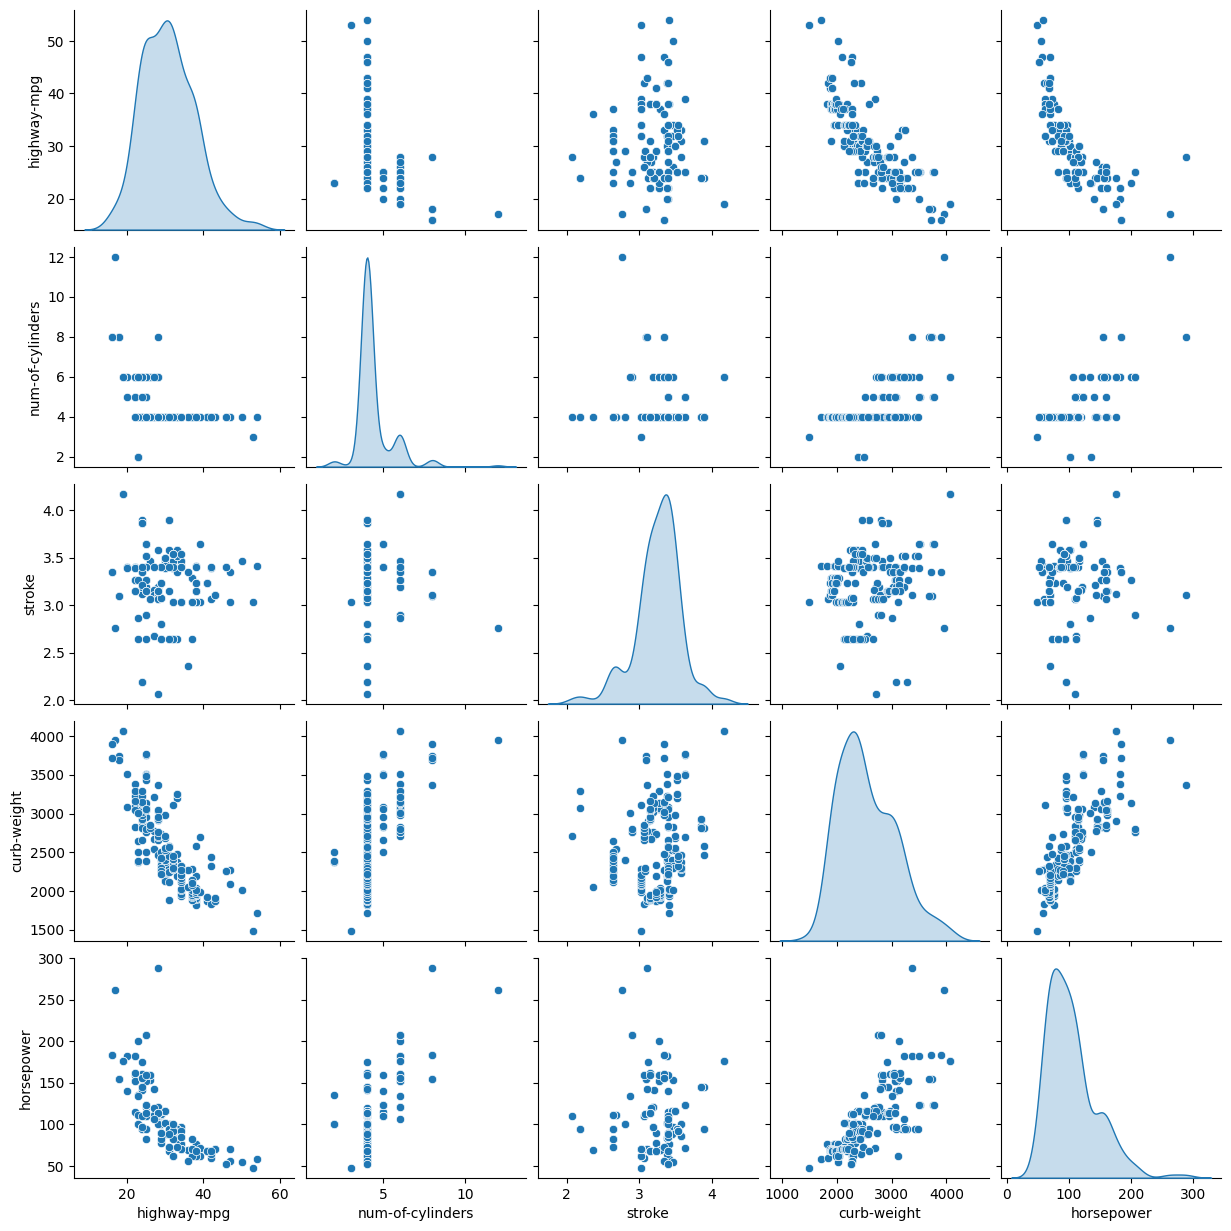

In [17]:
sns.pairplot(subset_df[["highway-mpg", "num-of-cylinders", "stroke", "curb-weight", "horsepower"]], diag_kind="kde")